In [102]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [103]:
clauses = []

num_literal = 0
num_clauses = 0

with open('SAT2018/Scheel/cms-scheel-md4-families-r24-c4-p4-9-13-18.cnf') as file:
    for line in file:
        if(line[0] == 'p'):
            l = line.split()
            num_literal = int(l[2])
            num_clauses = int(l[3])
        if(line[0] != 'p' and line[0] != '%' and line[0] != 'c'):
            clause = [int(digit) for digit in line.split()]
            clauses.append(clause[:-1])

In [104]:
def first(a, b):
    return a / (a + b)

def second(a, b):
    return a * (a + 1) / ((a + b + 1) * (a + b))

def solve(first, second):
    tau =  (second - first)/(first**2 - second)
    a = first * tau
    b = tau - a
    return a, b

In [105]:
def third(a, b):
    return (a * (a+1) * (a +2)) / ((a+b)*(a+b+1)*(a+b+2))

In [106]:
second(0.5, 0.5)

0.375

In [107]:
epochs = 100

In [108]:
def estimate_third(mu1, mu2):
    left = (mu2**2 - (mu1**2)*mu2) / mu1
    right = (((1-mu1)**2)*mu2 - mu2**2) / (1-mu1)
    to_raw = 3*mu1*(mu2+mu1**2)-2*(mu1**3)
    left += to_raw
    right += to_raw
    return (left+right)/2

In [109]:
first_moment = np.asarray([0.5] * num_literal)
second_moment = np.asarray([0.375] * num_literal)
third_moment = np.asarray([third(0.5, 0.5)] * num_literal)

def update_clause(input_clause):
    length_clause = len(input_clause)
    
    p = 1.0
    
    for i in range(length_clause):
        lit = input_clause[i]
        if(lit > 0):
            p = p * (1 - first_moment[abs(lit)-1])
        else:
            p = p * first_moment[abs(lit)-1]

    
    for i in range(length_clause):
        lit = input_clause[i]
        M1 = first_moment[abs(lit)-1]
        left_extre = 0.01
        right_extre = 0.99
        if(M1 < left_extre or M1 > right_extre):
            continue
        M2 = second_moment[abs(lit)-1]
        M3 = third_moment[abs(lit)-1]

        
        if(lit > 0):
            p_omit = p / (1 - M1)
            first_moment[abs(lit)-1] =  (M1 - p_omit * (M1 - M2))/ (1 - p)
            second_moment[abs(lit)-1] = (M2 - p_omit * (M2 - M3)) / (1 - p)
            third_moment[abs(lit)-1] = estimate_third(first_moment[abs(lit)-1], second_moment[abs(lit)-1] - first_moment[abs(lit)-1]**2)
        else:
            p_omit = p / M1
            first_moment[abs(lit)-1] = (M1 - p_omit * M2) / (1-p)
            second_moment[abs(lit)-1] = (M2 - p_omit * M3) / (1-p)
            third_moment[abs(lit)-1] = estimate_third(first_moment[abs(lit)-1], second_moment[abs(lit)-1] - first_moment[abs(lit)-1]**2)



        #print(first_moment[abs(lit)-1], second_moment[abs(lit)-1])

In [110]:
def satisfied_clauses():
    polarity = np.zeros(num_literal)
    for k in range(num_literal):
        if(first_moment[k] > 0.5):
            polarity[k] = 1
        else:
            polarity[k] = -1
    num_satisfied = 0
    for k in range(num_clauses):
        clause = clauses[k]
        for l in clause:
            if(l * polarity[abs(l) - 1] > 0):
                num_satisfied += 1
                break
    return num_satisfied

In [111]:
satisfied = np.zeros(epochs)

In [112]:
for k in range(epochs):
    for clause in clauses:
        update_clause(clause)
    satisfied[k] = satisfied_clauses()

In [113]:
satisfied_third = satisfied

In [95]:
satisfied_second = np.asarray([77850., 77684., 78964., 86413., 87552., 87523., 88598., 89115.,
       89615., 90208., 91246., 91752., 91962., 92148., 92315., 92381.,
       92411., 92453., 92521., 92549., 92567., 92646., 92805., 92827.,
       92839., 92855., 92867., 92877., 92882., 92887., 92895., 92905.,
       92913., 92924., 92926., 92930., 92941., 92944., 92946., 92949.,
       92955., 92957., 92959., 92965., 92969., 92970., 92973., 92975.,
       92975., 92979., 92981., 92989., 92992., 92993., 92999., 93006.,
       93012., 93014., 93016., 93018., 93019., 93020., 93020., 93020.,
       93020., 93021., 93022., 93022., 93022., 93022., 93022., 93024.,
       93024., 93024., 93024., 93024., 93024., 93024., 93025., 93026.,
       93026., 93026., 93026., 93026., 93026., 93026., 93026., 93026.,
       93026., 93026., 93026., 93026., 93026., 93026., 93026., 93026.,
       93026., 93026., 93026., 93026.])

In [96]:
satisfied_beta = np.asarray([79666., 78942., 79570., 83792., 86706., 88174., 88181., 87960.,
       88547., 88768., 89006., 89452., 89586., 89916., 90357., 90481.,
       90532., 90681., 90779., 90842., 90885., 90924., 90972., 91027.,
       91087., 91115., 91143., 91179., 91254., 91312., 91426., 91601.,
       91622., 91731., 91814., 91851., 91901., 91939., 91950., 91963.,
       91976., 91994., 92001., 92008., 92024., 92039., 92043., 92050.,
       92055., 92069., 92080., 92086., 92093., 92092., 92094., 92100.,
       92102., 92106., 92108., 92107., 92115., 92117., 92124., 92128.,
       92131., 92133., 92134., 92136., 92137., 92141., 92144., 92149.,
       92152., 92160., 92172., 92185., 92194., 92206., 92220., 92225.,
       92234., 92238., 92241., 92243., 92250., 92256., 92262., 92273.,
       92288., 92301., 92307., 92316., 92324., 92329., 92331., 92334.,
       92335., 92336., 92338., 92338.])

In [97]:
x = np.asarray(range(100))

In [98]:
num_clauses

10745

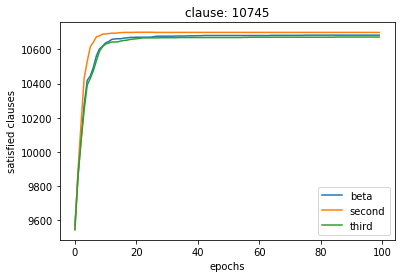

In [101]:
import matplotlib.pyplot as plt
plt.plot(x, satisfied_beta, label = "beta")
plt.plot(x, satisfied_second, label = "second")
plt.plot(x, satisfied_third, label = "third")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("satisfied clauses")
plt.title("clause: 10745")
plt.show()

In [100]:
num_clauses

10745

In [21]:
satisfied_clauses()

1061

In [90]:
num_clauses

219071

In [133]:
np.random.beta(5, 5) * (right - left) + left

0.26019068311926996